# Using the JupyterLab Environment

JupyterLab is a modern interactive development environment (IDE) that allows you to work with code, data, and the Jupyter notebook format. Starting with v1.5.0, the ArcGIS API for Python can be used in JupyterLab for a truly powerful development experience.

-----

![](../../static/img/jlab_workflow.gif)

-----


JupyterLab builds upon all of the major components of the classic Jupyter Notebook experience (notebooks, terminal, text editor, file browser, ipywidgets, etc.) to create a flexible and powerful user experience. Click [here](https://blog.jupyter.org/jupyterlab-is-ready-for-users-5a6f039b8906) or [here](https://github.com/jupyterlab/jupyterlab) to read more about JupyterLab.

# Getting Started

## Installation

1. Install >=v1.5.0 of the ArcGIS API for Python in a new conda environment. Activate that environment.

2. Run the following 2 commands:
```
jupyter labextension install @jupyter-widgets/jupyterlab-manager
jupyter labextension install arcgis-map-ipywidget@1.5.0
```

    - __IMPORTANT__: replace `1.5.0` with the _exact_ version number of the Python API you have installed.
    - You may need to have `npm` and/or `nodejs` installed on your computer and in this environment in order to succesfully complete this step.

3. Now that you have set up the arcgis extensions, run `jupyter lab` from the same command prompt to launch an instance of JupyterLab.

## File Explorer

Just like the classic Jupyter Notebook experience, JupyterLab offers a file explorer to open existing notebooks, create new notebooks, and organize your content. JupyterLab's file explorer is on the left pane of the main view.

------

![](../../static/img/jlab_file_explorer.gif)

------

__JupyterLab interacts with the same .ipynb notebook format__. The only difference is the user interface, and the additions of some other external extensions.

## Using Windows and Tabs

You may notice that Jupyter has a concept of 'windows' and 'tabs', unlike the classic Jupyter Notebook experience. This is a very powerful feature of JupyterLab: you can stack notebooks, place notebooks side by side, organize notebooks by tabs, etc. Simply click and drag any 'tab' as seen below:

------

![](../../static/img/jlab_navigate_windows.gif)

------


__Any window can be dragged like this__. JupyterLab lets you view and edit file types such as _.csv_, _.json_, etc. in new windows, as seen above.

## Using Cell Utilities

Similar to the windows and tabs above, JupyterLab allows users to move cells in a notebook by dragging and dropping them. JupyterLab also supports dragging cells from one notebook to another notebook. Simply click the area to the left of the cell you want to move, and drag it wherever:

-----

![](../../static/img/jlab_cell_utilities_1.gif)

-----

JupyterLab also lets you select multiple cells by holding the _Shift_ key. You can move these cells as mentioned before, or right click and select 'Copy Cells' to copy them. JupyterLab has many options in their right click context menu worth exploring, including the 'Create New View For Output' option. This allows you to take __any__ cell output and duplicate it in a new window, allowing you to stack it, view it side-by-side, etc.

-----

![](../../static/img/jlab_cell_utilities_2.gif)

------

There are other cool things you can do with cells in JupyterLab not described in this guide, keep on exploring!

## Integration with the Map Widget

v1.5.0 of the ArcGIS API for Python introduces many new exciting features for the Map Widget, including 2D rotation, 3D mode, 3D renderer support, and more. You can read [this guide page](../advanced-map-widget-useage) for more information about these other features of the new widget: this guide will highlight the map widget's seamless JupyterLab integration.

-----

![](../../static/img/jlab_widget_1.gif)

----


The `MapView` class's default view behavior is the same as in the classic Jupyter Notebook environment: the widget is displayed it in a cell's output area. However, you may notice a new UI button that is only visible in a JupyterLab environment:

 

By pressing this button, your widget will move from your cell's output area into a new window. This window can be tabbed, split, etc. like all other windows. If you want to restore the widget to the notebook it originated from, press this button:

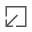

Try this for yourself! If you're reading this guide in a JupyterLab setting, run the below cell:

In [1]:
from arcgis.gis import GIS

#Create a map widget like you have done many times before
gis = GIS()
map = gis.map()
map

MapView(layout=Layout(height='400px', width='100%'))

### WebMaps and WebScenes

WebMap and WebScene Objects include this same UI button: run the two below cells to try for yourself!

In [2]:
from arcgis.mapping import WebMap
webmap_item = gis.content.get("ab42b088573d4253a22a8b38ee698ccd")
webmap = WebMap(webmap_item)
webmap

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [3]:
from arcgis.mapping import WebScene
webscene_item = gis.content.get("421433baeb8d487b903d4a89df79149b")
webscene = WebScene(webscene_item)
webscene

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'), mode='3D')

### Controlling New Windows Programatically

Although you just drove this cool new window functionality with your mouse, you still are using __Python__: what sort of Python API would this be if we didn't provide you the option to control this functionality programmatically?!

Each instances of a `MapView` widget has a `tab_mode` property and a `toggle_window_view()` method. Setting `tab_mode` will change how the map widget goes into a new window. Try running the below cells to experiment with this behavior:

In [6]:
#First, draw a map
map = gis.map()
map

MapView(layout=Layout(height='400px', width='100%'))

In [5]:
#Set the tab mode to one of the below options, run the cell, then press the 'new window' button
map.tab_mode = "split-bottom"
#map.tab_mode = "split-right"
#map.tab_mode = "auto"
#map.tab_mode = "tab-after"

After a map is displayed, you can call the `toggle_window_view()` method to move the map to a new window. You can then call this method while the widget is already in a new window to restore the widget to the original notebook. (i.e., each call to this method is the functional equivalent of pressing the button). Try running the below cells:

In [ ]:
from arcgis.widgets import MapView
#First, draw a map
map = MapView(gis=gis)
map

In [ ]:
#Run this cell a few times in a row
map.toggle_window_view()

You can also programatically specify the `title` (text displayed on the tab) and `tab_mode` in each method call:

In [ ]:
#First, draw a map
map = gis.map(mode="3D")
map

In [ ]:
#Run this cell to move it in a new window
map.toggle_window_view(title="My 3D Map", tab_mode="split-top")

In [ ]:
#Then, run this cell to move it back to the notebook
map.toggle_window_view()

In [ ]:
#Run this cell to cycle through all tab_modes
tab_modes = ['auto', 'split-top' 'split-bottom', 'split-left',
             'split-right', 'tab-before', 'tab-after']
for tab_mode in tab_modes:
    #to new window
    map.toggle_window_view(title=tab_mode, tab_mode=tab_mode)
    time.sleep(4)
    #to original notebook
    map.toggle_window_view()
    time.sleep(4)

This functionality can be very powerful in many ways: Say you have a list of 3 or more WebScene items, and you want to display them all in new tabs in 1 cell call. You would write something like this:

In [ ]:
#Run this cell, it works!
from arcgis.gis import GIS
from arcgis.widgets import MapView
gis = GIS()
for webscene_id in ['31874da8a16d45bfbc1273422f772270',
                    '91b46c2b162c48dba264b2190e1dbcff',
                    '46c47340708f446ba7f112f139e8ae5e']:
    webscene_item = gis.content.get(webscene_id)
    map = MapView(gis=gis, item=webscene_item, mode="3D") 
    map.toggle_window_view(title=webscene_item.title, tab_mode='tab-after')


See [the API reference](https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.widgets.html#arcgis.widgets.MapView.toggle_window_view) for more information on programatic control of the Map Widget.

# Conclusion

JupyterLab implements many features you can leverage right now to make the most of your experience with the ArcGIS API for Python. Try it out, and please [leave us a comment, suggest a feature, or report a bug](https://github.com/Esri/arcgis-python-api/issues/new)! We look forward to seeing what you will create in JupyterLab!